Course 3 - Writing functions
============================

In this worksheet we will learn about

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Writing new functions
----------------------

The syntax to write a function is as follows

    def name_of_the_function(arguments):
        computation1
        computation2
        ...
        return result

Let us show as a concrete example the function `(x, y) -> cos(x) + sin(y)`.

    def f(x, y):
        from math import cos, sin
        s = cos(x)
        t = sin(y)
        return s + t

**Exercise**

Copy the function `f` in the cell below and test it with various input values.

A Python function needs not return a value! For example the following function just print a welcome message

    def welcome_message(name):
        s = "Hello " + name + "!"
        print(s)
        
**Exercise**
- Copy the function `welcome_message` in a code cell and use it to print a welcome message with your name.

- What is the output value of `welcome_message`? (*hint*: use the `type` function that we used at the begining of this sheet)

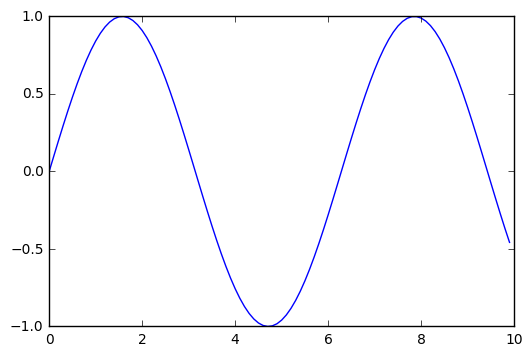

In [2]:
x = np.arange(0.,10.,0.1)   # make an array of numbers
y = np.sin(x)               # compute sin component-wise
ll = plt.plot(x,y)          # create a plot
plt.show()                  # showing the plot

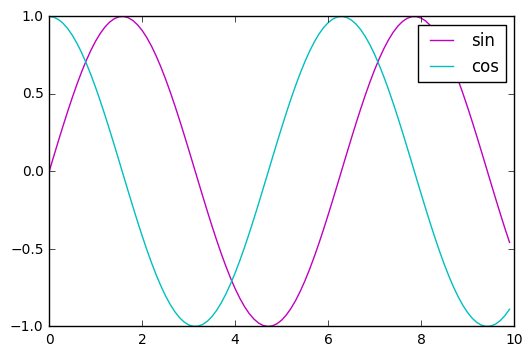

In [8]:
x = np.arange(0.,10.,0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, 'm', label='sin')
plt.plot(x, y2, 'c', label='cos')
plt.legend()
plt.show()

In [18]:
import math
def factor(n):
    if not isinstance(n, int):
        raise TypeError
    if n <= 0:
        raise ValueError
        
    facs = []
    
    z = 0
    while n % 2 == 0:
        n >>= 1
        z += 1
    if z:
        facs.append((2,z))
        
    m = math.sqrt(n) + 1
    i = 3
    while i < m:
        z = 0
        while n % i == 0:
            z += 1
            n //= i
        if z:
            facs.append((i, z))
            m = math.sqrt(n) + 1
        i += 2

    if n != 1:
        facs.append((n,1))
        
    return facs  

def num_divisors(n):
    f = factor(n)
    s = 1
    for p,k in f:
        s *= k + 1
    return s

In [17]:
factor(20)

[(2, 2), (5, 1)]

In [20]:
num_divisors(20)

6

In [25]:
X = range(2, 5000)
Y = list(num_divisors(x) for x in X)

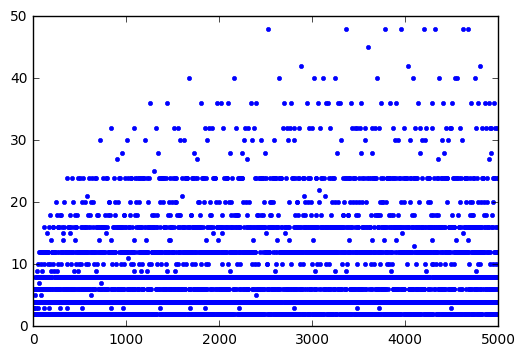

In [26]:
plt.plot(X, Y, '.')
plt.show()

In [44]:
def gap_distribution(sample):
    N = len(sample)
    sample = [x - math.floor(x) for x in sample]
    sample.sort()
    return [N * (sample[i+1] - sample[i]) for i in range(N-1)]

In [43]:
import math
import random

In [186]:
X1 = gap_distribution([random.random() for _ in range(1000)])

In [187]:
X2 = gap_distribution([math.sqrt(n) for n in range(1000)])

In [188]:
alpha = (math.sqrt(5) - 1)/2
X3 = gap_distribution([alpha* n for n in range(500)])

In [189]:
X4 = gap_distribution(np.cos(np.arange(0, 1000, 1)))

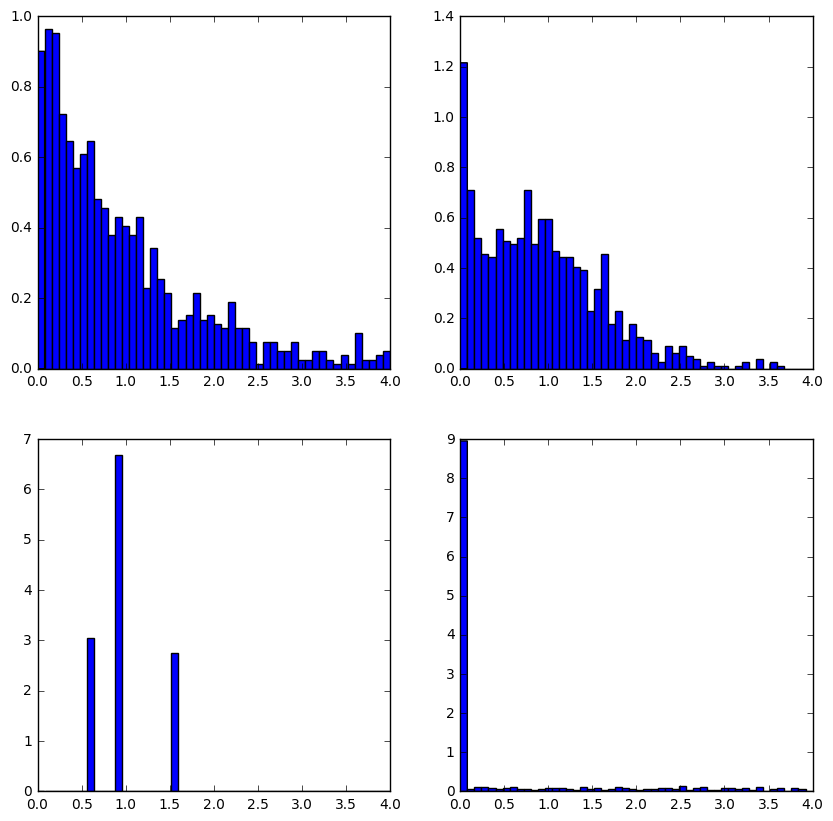

In [89]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.hist(X1, bins=50, range=(0,4), normed=True)
ax2 = fig.add_subplot(222)
ax2.hist(X2, bins=50, range=(0,4), normed=True)
ax3 = fig.add_subplot(223)
ax3.hist(X3, bins=50, range=(0,4), normed=True)
ax4 = fig.add_subplot(224)
ax4.hist(X4, bins=50, range=(0,4), normed=True)
plt.show()

In [191]:
s = pandas.Series(X1)

In [192]:
s.mean()

1.0004000320357627

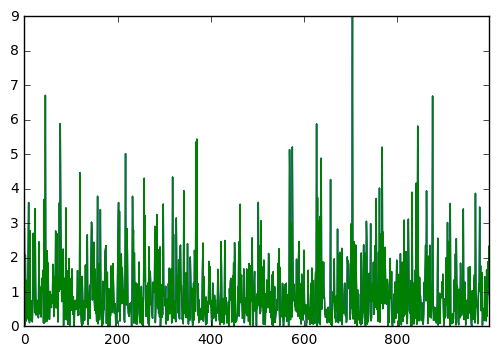

In [195]:
s.plot()
plt.show()

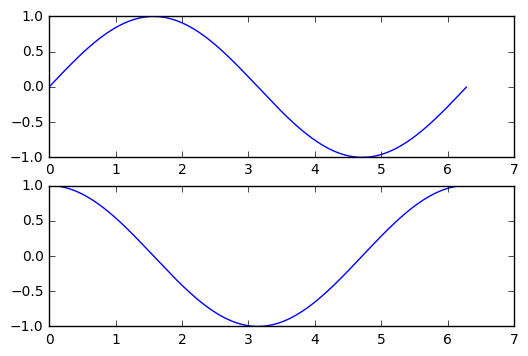

In [90]:
X = np.arange(0, 2*math.pi, 0.01)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(X, np.sin(X))
ax2 = fig.add_subplot(212)
ax2.plot(X, np.cos(X))
plt.show()

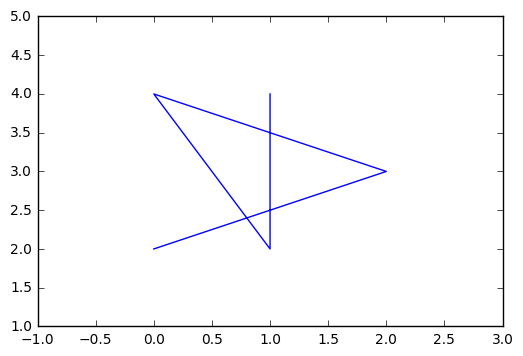

In [95]:
X = [0, 2, 0, 1, 1, 1]
Y = [2,3, 4, 2, 3, 4]
plt.plot(X,Y)
plt.xlim(-1, 3)
plt.ylim(1, 5)
plt.show()

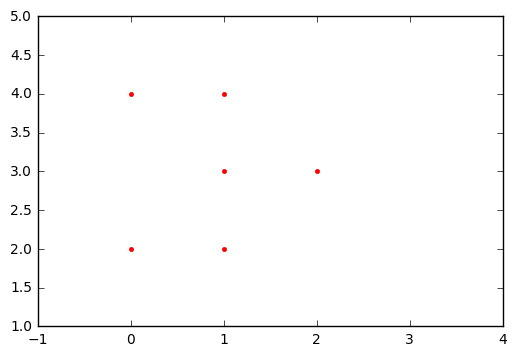

In [98]:
plt.plot(X,Y,'.r')
plt.xlim(-1, 4)
plt.ylim(1, 5)
plt.show()

In [73]:
plt.savefig?

In [113]:
def cycle_decomposition(p):
    n = len(p)
    cycles = []
    seen = [False] * n
    for i in range(n):
        if seen[i]:
            continue
        c = []
        while seen[i] is False:
            c.append(i)
            seen[i] = True
            i = p[i]
        cycles.append(c)
    return cycles

In [136]:
def random_permutation1(n):
    X = [(random.random(),i) for i in range(n)]
    X.sort()
    return [x[1] for x in X]

def random_permutation2(n):
    X = list(range(n))
    for i in range(n-1):
        j = random.randint(i, n-1)
        if i != j:
            X[i], X[j] = X[j], X[i]
    return X

In [175]:
s1 = [len(cycle_decomposition(random_permutation1(100))) for _ in range(5000)]
s2 = [len(cycle_decomposition(random_permutation2(100))) for _ in range(5000)]

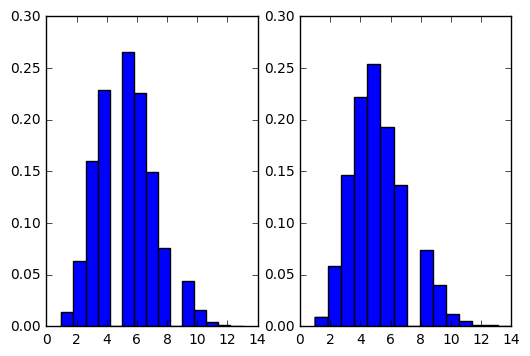

In [176]:
ax1 = plt.subplot(1, 2, 1)
ax1.hist(s1, bins=15, normed=True)
ax2 = plt.subplot(1, 2, 2)
ax2.hist(s2, bins=15, normed=True)
plt.show()

In [179]:
print(np.mean(s1))
print(np.std(s1))

5.2084
1.89730583723


In [180]:
print(np.mean(s2))
print(np.std(s2))

5.2104
1.89645243547


In [181]:
import urllib

In [182]:
import pandas

In [199]:
import scipy